# RADIS: GPU vs CPU Performance Comparison with examples

This notebook is meant to provide users with examples on how to compute spectra using RADIS with the assistance of GPUs. It will also serve as comparison tests between the performance difference witnessed between the CPU and GPU comparisons.

In our first example, where we use a very small part of the CDSD-4000 dataset to show how the GPU computation calls are made, we will observe that the GPU computes the spectra around **4 times** faster than the CPU. While this is significant, it is still not pushing the GPU in terms of its computation power. As the dataset increases, we see the contrast between the GPU and CPU performance become more evident.

In our second example, where we load ~ 5M lines from the CDSD-4000 dataset, we will observe a significant difference in the time taken by the two methods to compute the spectra, with the GPU outperforming the CPU by a very significant margin (**~0.5 seconds on GPU vs 5.42 seconds on CPU**).

Let us first import some necessary modules

In [1]:
import radis
from radis import plot_diff
from radis import SpectrumFactory
from radis.test.utils import getTestFile
from radis import calc_spectrum

## Computing spectra using the RADIS test file

This is primarily meant as an example to show the contrast between the non-GPU and GPU methods.

First we define the SpectrumFactory object as follows:

In [11]:
T = 1000
p = 0.1
wstep = 0.001
wmin = 2284.0  # cm-1
wmax = 2285.0  # cm-1
sf = SpectrumFactory(
        wavenum_min=wmin,
        wavenum_max=wmax,
        mole_fraction=0.01,
        path_length=1,  # doesnt change anything
        wstep=wstep,
        pressure=p,
        isotope="1",
        cutoff=0,
        chunksize="DLM",
        warnings={
            "MissingSelfBroadeningWarning": "ignore",
            "NegativeEnergiesWarning": "ignore",
            "HighTemperatureWarning": "ignore",
            "GaussianBroadeningWarning": "ignore",
        },
        verbose=0  # do not produce any output while calculating spectra
)
sf._broadening_method = "fft"

Load the data in memory, for this case we're using a CDSD-4000 fragment as an example

In [12]:
dirpath = getTestFile("cdsd_hitemp_09_fragment.txt")

In [13]:
sf.load_databank(path=dirpath, format="cdsd-4000", parfuncfmt="hapi")

### Compute the spectrum on RADIS CPU

In [14]:
s_cpu = sf.eq_spectrum(Tgas=T)

Plot the results

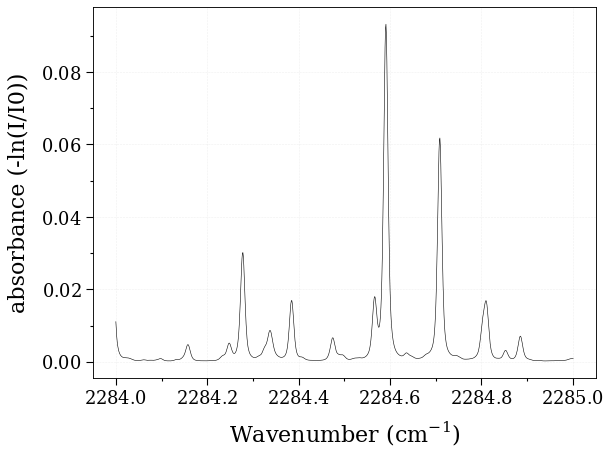

In [15]:
s_cpu.plot('absorbance')



### Now let us compute the same spectra on RADIS GPU

In [16]:
s_gpu = sf.eq_spectrum_gpu(Tgas=T)

Plot the result

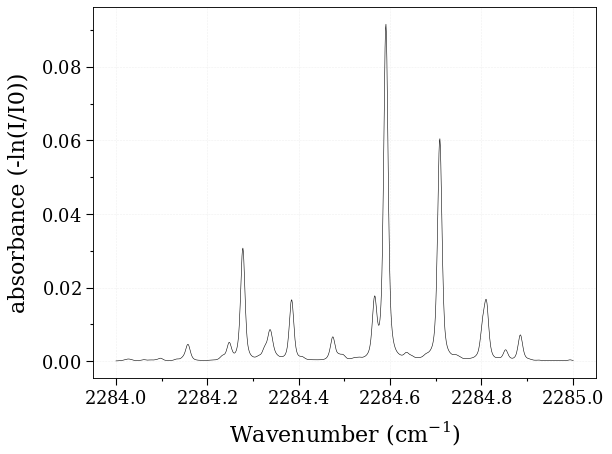

In [17]:
s_gpu.plot('absorbance')

Let us now look at the calculation times for the two spectras

In [21]:
print("Spectrum computed on CPU in {0} ms. Number of lines = {1}".format(s_cpu.get_conditions()['calculation_time'], s_cpu.get_conditions()['lines_calculated']))
print("Spectrum computed on GPU in {0} ms. Number of lines = {1}".format(s_gpu.get_conditions()['calculation_time'], s_gpu.get_conditions()['lines_calculated']))

Spectrum computed on CPU in 0.04 ms. Number of lines = 2284
Spectrum computed on GPU in 0.01 ms. Number of lines = 2284


Let us now compare the results of the two spectras:

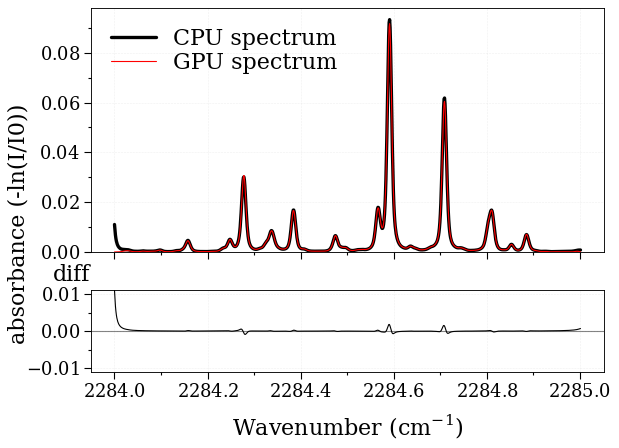

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff3b0c6a908>])

In [20]:
s_cpu.name = "CPU spectrum"
s_gpu.name = "GPU spectrum"
plot_diff(s_cpu, s_gpu, var='absorbance')

--------------------------------------------------------------------------------

## A larger spectra: 2300-2400 cm-1 with 5M lines!

Let us now look at a larger example with around 5M lines.

In [22]:
T = 1000
p = 0.1
wstep = 0.001
wmin = 2300.0  # cm-1
wmax = 2400.0  # cm-1
sf = SpectrumFactory(
        wavenum_min=wmin,
        wavenum_max=wmax,
        mole_fraction=0.01,
        path_length=1,  # doesnt change anything
        wstep=wstep,
        cutoff=0,
        pressure=p,
        isotope="1,2,3",
        chunksize="DLM",
        warnings={
            "MissingSelfBroadeningWarning": "ignore",
            "NegativeEnergiesWarning": "ignore",
            "HighTemperatureWarning": "ignore",
            "GaussianBroadeningWarning": "ignore",
        },
        verbose=0
)
sf._broadening_method = "fft"

In [23]:
dirpath = '/home/pankaj/radis-lab/par-2300-2400/*'
sf.load_databank(path=dirpath, format="cdsd-4000", parfuncfmt="hapi")

In [24]:
sf.df0

,id,iso,wav,int,A,airbrd,selbrd,El,Tdpair,Pshft,...,polyu,wangu,ranku,polyl,wangl,rankl,branch,jl,Ia,molar_mass
0,2,1,2330.0000,1.110000e-82,0.4850,0.0446,0.0689,29897.7097,0.56,0.000000,...,30,1,267,27,1,152,1,175,0.984204,43.98983
1,2,1,2330.0000,1.460000e-71,0.0975,0.0573,0.0639,24199.1858,0.63,0.000000,...,32,1,420,29,1,262,1,107,0.984204,43.98983
2,2,1,2330.0000,1.010000e-77,1.7100,0.0690,0.0899,27482.8406,0.68,-0.003147,...,43,2,922,40,2,622,1,35,0.984204,43.98983
3,2,1,2330.0000,2.560000e-72,0.5220,0.0687,0.0768,24764.9686,0.72,-0.000200,...,39,1,463,36,1,265,1,54,0.984204,43.98983
4,2,1,2330.0000,4.010000e-73,0.1340,0.0642,0.0633,24957.2457,0.69,0.005093,...,34,1,733,31,1,553,1,85,0.984204,43.98983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878704,2,1,2389.9997,9.930000e-78,0.3730,0.0496,0.0674,27433.4246,0.57,0.000000,...,32,1,585,29,1,406,1,135,0.984204,43.98983
4878705,2,1,2389.9998,1.200000e-63,0.1310,0.0692,0.0906,20286.3902,0.69,-0.002130,...,32,1,446,29,2,240,0,38,0.984204,43.98983
4878706,2,1,2389.9998,3.660000e-49,0.3680,0.0687,0.0814,13689.6194,0.71,-0.001324,...,21,1,198,18,1,118,1,48,0.984204,43.98983
4878707,2,1,2389.9998,9.750000e-62,0.3110,0.0653,0.0639,19716.7387,0.70,0.000000,...,28,1,324,25,1,186,1,81,0.984204,43.98983


Note that now we're working on almost 5M lines.

### Compute the CPU spectrum like normal

In [25]:
s_cpu = sf.eq_spectrum(Tgas=T)

/home/pankaj/radis/radis/misc/warning.py:242: MemoryUsageWarning: Line database is large: 1210 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))


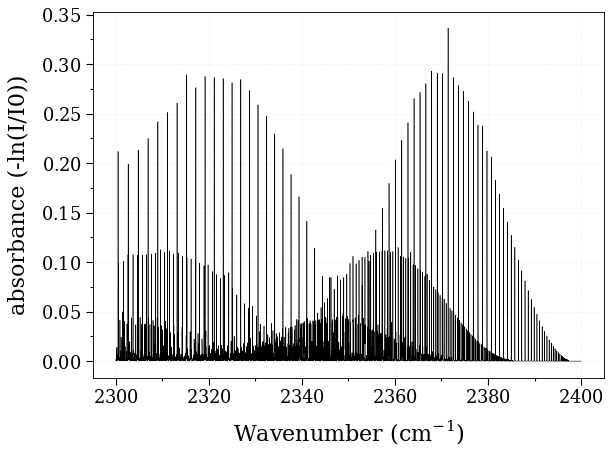

In [26]:
s_cpu.plot('absorbance')

### Compute the GPU spectrum

In [27]:
s_gpu = sf.eq_spectrum_gpu(Tgas=T)

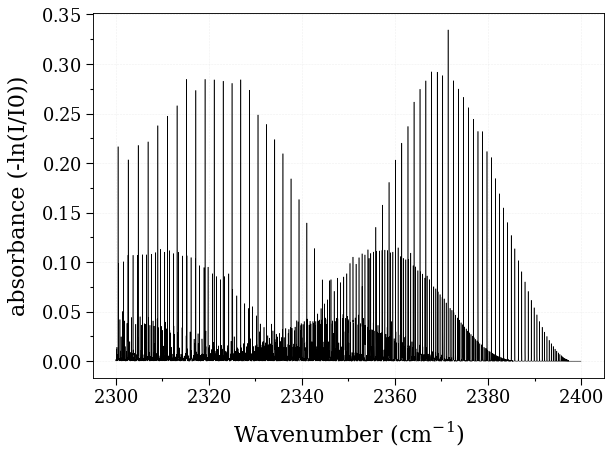

In [28]:
s_gpu.plot('absorbance')

In [29]:
s_cpu.name = "CPU spectrum"
s_gpu.name = "GPU spectrum"

<IPython.core.display.Javascript object>


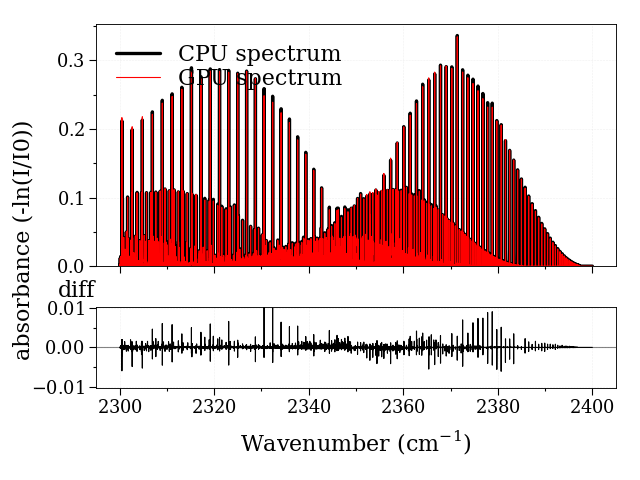

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff3b00d6780>])

In [30]:
%matplotlib notebook
plot_diff(s_cpu, s_gpu, var='absorbance')

In [31]:
print("Spectrum computed on CPU in {0} ms. Number of lines = {1}".format(s_cpu.get_conditions()['calculation_time'], s_cpu.get_conditions()['lines_calculated']))
print("Spectrum computed on GPU in {0} ms. Number of lines = {1}".format(s_gpu.get_conditions()['calculation_time'], s_gpu.get_conditions()['lines_calculated']))

Spectrum computed on CPU in 5.42 ms. Number of lines = 4878709
Spectrum computed on GPU in 0.43 ms. Number of lines = 4878709


Thus, here, we clearly see the difference in the performance offered by the two methods. GPU makes the computation process significantly faster, as we see above.